## ANALYSIS OF THE TWO-POT RETIREMENT IN SOUTH AFRICA

## INTRODUCTION

The two-pot retirement system in South Africa aim to balance the immediate finacial needs of employees with their long-term saving goals.This analysis help yto understand employee behavior regarding withdrawal and long-term saving growth under this new system.By leveraging the machine learning and analysis techniques, we will address questions regarding financial behavior , economic factors and employee sentiment.

## Objectives

Predict withdrawals: Require to build a machine learning model to predict which employees are likely to withdraw funds from the accessible within the next 12 months.
Focast growth: Required to analyse and forecast the growth of the savings in the locked pot over time usin time series analysis.
Sentiment analysis: Required to analyze employee feedback on the two-pot system to determine general sentiment and identify areas of concern.

## Dataset Description
I have selected the dataset titled `Employment-indicators-paid-jobs-week-ended-17-may-2020.csv`, appears suitable for forecasting within the context of the two-pot retirement system, particularly in understanding how employment trends and earnings influence employee behavior regarding retirement savings and withdrawals.
Click this link to download it: https://www.stats.govt.nz/assets/Uploads/Employment-indicators/Employment-indicators-Paid-jobs-week-ended-17-May-2020/Download-data/Employment-indicators-paid-jobs-week-ended-17-may-2020.csv

I have selected the dataset titled `Employee.csv`,aimed at predicting employee behavior, such as whether they will withdraw from the retirement system (or "leaveOrNot" as an indicator of withdrawal)
Click this link to download: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

## DECISION TREE

In [504]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  #data manipulation and analysis
from sklearn.model_selection import train_test_split

In [505]:
df=pd.read_csv(r"C:\Users\cash\Downloads\Employee.csv")

In [506]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [507]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [508]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [509]:
df.dropna()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [510]:
# Define the feature matrix (X) and target vector (y)
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']


In [511]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [512]:
# Apply One-Hot Encoding to all categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Display the first few rows of the encoded DataFrame to check the changes



# Replace 'Target' with the actual name of your target column
X = df.drop('LeaveOrNot', axis=1)  # Replace 'Target' with your actual target variable name
y = df['LeaveOrNot']                # Replace 'Target' with your actual target variable name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Focasting(Long-term saving growth)

## Justification for Suitability

Employment-indicators-paid-jobs-week-ended-17-may-2020 is suitable for forecasting in the context of the two-pot retirement system scenario as :
Weekly Indicators: The dataset includes a week_end column, which indicates the time period for each observation. This is crucial for time series forecasting as it allows you to analyze trends over time.

Weekly Earnings: The value column represents the money earned by employees weekly. This is directly relevant to the two-pot system, as higher earnings may influence employees ability to contribute to their retirement savings and manage their withdrawals from the accessible pot



In [513]:
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt  #data manipulation and analysis
import warnings  #data manipulation and analysis
from prophet import Prophet  #data manipulation and analysis

In [514]:
#loading the dataset
df= pd.read_csv(r"C:\Users\cash\Downloads\Employment-indicators-paid-jobs-week-ended-17-may-2020.csv")

In [515]:
# Ignores all warnings
warnings.filterwarnings("ignore")

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_end       680 non-null    object 
 1   indicator      680 non-null    object 
 2   high_industry  680 non-null    object 
 3   value          680 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.6+ KB


In [517]:
df.head()

,week_end,indicator,high_industry,value
0,5/05/2019,Number of Paid Jobs - 6 days,A Primary,67670.0
1,5/05/2019,Number of Paid Jobs - 6 days,B Goods Producing,332730.0
2,5/05/2019,Number of Paid Jobs - 6 days,C Services,1026630.0
3,5/05/2019,Number of Paid Jobs - 6 days,Total,1438160.0
4,5/05/2019,Number of Paid Jobs - 13 days,A Primary,87870.0


In [518]:
df.loc[1:5]

,week_end,indicator,high_industry,value
1,5/05/2019,Number of Paid Jobs - 6 days,B Goods Producing,332730.0
2,5/05/2019,Number of Paid Jobs - 6 days,C Services,1026630.0
3,5/05/2019,Number of Paid Jobs - 6 days,Total,1438160.0
4,5/05/2019,Number of Paid Jobs - 13 days,A Primary,87870.0
5,5/05/2019,Number of Paid Jobs - 13 days,B Goods Producing,391050.0


In [519]:
df.duplicated().sum()

231

In [520]:
df.size

3648

In [521]:
df.describe()

,value
count,6.800000e+02
mean,9.580970e+05
std,7.685757e+05
min,5.702000e+04
25%,2.291975e+05
50%,6.943600e+05
75%,1.609022e+06
max,2.239060e+06


In [522]:
# Rename 'week_end' to 'ds' and 'value' to 'y'
df = df.rename(columns={'week_end': 'ds', 'value': 'y'})

In [523]:
#converting 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')

In [524]:
# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['ds'])

In [525]:
#initializing prophet
model=Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

14:53:07 - cmdstanpy - INFO - Chain [1] start processing
14:53:07 - cmdstanpy - INFO - Chain [1] done processing


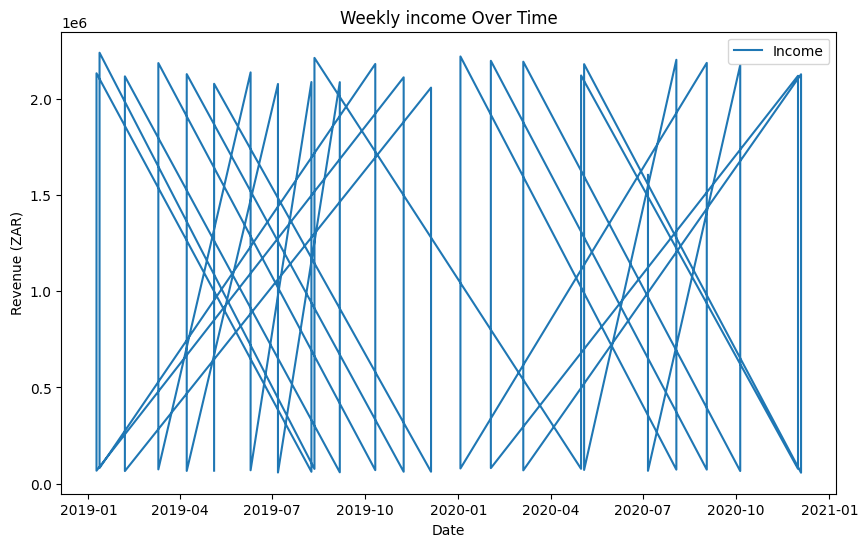

In [526]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Income')
plt.title('Weekly income Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (ZAR)')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

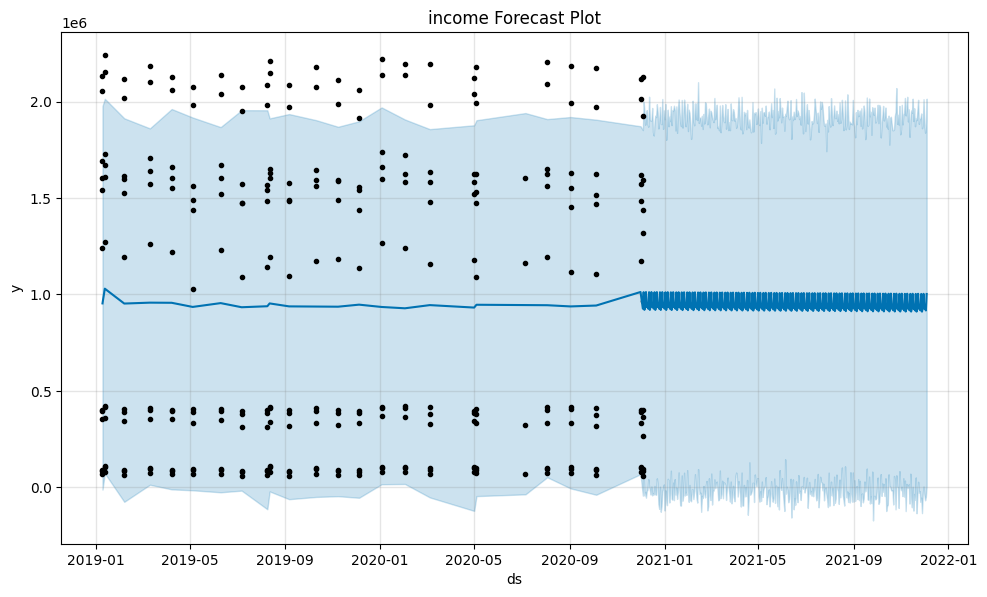

In [527]:
plt.figure()
model.plot(forecast)
plt.title("income Forecast Plot")
plt.show()

## Sentiment Analysis(Employee Feedback)

## Documentation of Sentiment Analysis

## Overview
Sentiment analysis is a method for figuring out the text's emotional undertone. This analysis can be used to determine how employees feel about the policy generally as well as how satisfied or unsatisfied they are with the two-pot retirement system.

## Goals
- **Understand Employee Sentiment**: Examine employee comments to determine whether staff members have a favorable, unfavorable, or neutral opinion of the two-pot arrangement.
- **Inform Policy Adjustments**: Based on employee feedback and concerns, use insights to offer modifications or enhancements to the two-pot system.

## Procedures for Sentiment Analysis

 1. Data Collection - **Collect Feedback from Employees**: Gather qualitative information about the two-pot retirement system via questionnaires, interviews, or comment sections. Make sure a variety of staff perspectives and experiences are included in the data.

2. Preprocessing Data
Clear the Textual Data:
Eliminate any extraneous characters (special symbols, punctuation).
To keep everything consistent, change all of the text to lowercase.
Eliminate stop words, which are common words like "and," "the," and "is" that don't significantly contribute meaning.

3. The Sentiment Analysis Technique
Choose a Tool for Sentiment Analysis: Select a library or tool that is appropriate for sentiment analysis. Popular choices include of:
Short feedback and social media texts are best served by VADER (Valence Aware Dictionary and Sentiment Reasoner).
TextBlob: Good all-around sentiment analysis tool with an easy-to-use API.
Pre-trained NLP models (such as BERT): useful for more intricate analyses in where additional context is required.

 4. Sentiment Classification
Analyze the Cleaned Text:
Input the preprocessed text into the sentiment analysis model.
Classify the sentiments into categories such as:
Positive: Indicating satisfaction or approval.
Negative: Indicating dissatisfaction or concern.
Neutral: Neither positive nor negative, often indicating indifference.

 5. Interpretation of Results
Summarize Findings:
Calculate the percentage of each sentiment category (positive, negative, neutral).
Identify key themes or topics within the feedback that contributed to positive or negative sentiments.

 6. Visualization (Optional)
Create Visual Representations:
Use charts or graphs to illustrate sentiment distribution, making it easier to present findings to stakeholders.
Word clouds can be useful for highlighting common words or phrases in the feedback.
